# MTA SUBWAY TERMINAL ON-TIME PERFORMANCE
## BIA 610 APPLIED ANALYTICS: FINAL PROJECT


### Submitted By: Sai Sruthi Chalasani, Venkata Sandilya Bagavathula and Sahithi Setty


### 1.1 INTRODUCTION

The MTA subway is an essential transportation system for the people of New York City. However, it's crucial to ensure that the subway runs smoothly and efficiently, given the millions of people depending on it every day. In this project, we aim to analyze the on-time performance of the MTA subway system from 2015 to 2019. We seek to identify the best and worst on-time terminal performances by year and line, understand how terminal on-time performance varies by month and line, analyze the subway lines based on track counts, and understand the performance based on division/year. This analysis will provide valuable insights into the reliability and efficiency of the subway system, helping commuters plan their routes and schedules more effectively and avoid potential crowds and delays.

### 1.2 Provide a short explanation of how you plan to address this problem statement (the data used and the methodology employed) 

In this analysis, we investigate the punctuality of the MTA subway system between 2015 and 2019. Our objective is to address various business inquiries, including the identification of the highest and lowest performing terminals in terms of punctuality on a yearly and line basis. We also aim to examine how terminal punctuality varies across different months and lines. Furthermore, we determine the top 7 lines exhibiting the best punctuality. Additionally, we conducted an analysis of subway lines based on track counts. The data has been preprocessed and organized to facilitate predictive analysis. For this purpose, we utilized Linear Regression and Random Forest machine learning models. Finally, we evaluated the results of our analysis.


### 1.3 Discuss your current proposed approach/analytic technique you think will address (fully or partially) this problem.)

The analysis aims to offer users valuable information regarding the dependability and effectiveness of the subway system. By determining the most punctual lines and stations, commuters can enhance their route planning and scheduling for improved efficiency. Moreover, identifying the busiest stations enables commuters to steer clear of potential congestion and delays. In essence, through an examination of the subway system's timeliness, we can gain valuable insights into its advantages and disadvantages, empowering us to make more knowledgeable choices as subway users.

### 1.4 Explain how your analysis will help the consumer of your analysis.

This analysis is for anyone who is takes the New York City Subway. The analysis of the MTA subway system's on-time performance will provide valuable insights to the consumers. Understanding which lines and terminals have the best on-time performance can help commuters plan their routes and schedules more effectively and avoid potential crowds and delays. Additionally, identifying the busiest stations can help commuters plan their trips more efficiently. By analyzing the subway system's performance, we can gain a better understanding of its strengths and weaknesses, helping commuters make more informed decisions about their travel plans. This analysis will also benefit the MTA by identifying areas for improvement and helping them allocate resources more efficiently.

## DATA PREPARATION

### 2.1 
The dataset was sourced from data.gov https://data.ny.gov/Transportation/MTA-Subway-Terminal-On-Time-Performance-2015-2019/f6rf-2a3t

### 2.2 
The data provides comprehensive information on the on-time performance of subway terminals in New York City from 2015 to 2019. It comprises of 1665 rows and 7 columns, including month, line, division, day_type, num_on_time_trips, num_sched_trips, and terminal_on_time_performance.
The "month" column indicates the specific month and year of data collection, while the "line" column denotes the subway line, including 1, 2, 3, A, B, C, S 42nd, S Fkln, and S Rock. The "division" column identifies the subway division, either A or B Division, and the "day_type" column denotes whether the data was collected on a weekday (1) or a weekend (2).
The "num_on_time_trips" column records the total number of on-time trips for a particular terminal, line, division, and day type, whereas the "num_sched_trips" column records the total number of scheduled trips for the same terminal, line, division, and day type. Finally, the "terminal_on_time_performance" column provides valuable insights into the percentage of on-time trips for each specific terminal, line, division, and day type.
Overall, this dataset presents a unique opportunity to gain a comprehensive understanding of the on-time performance of subway terminals in New York City. The insights derived from this dataset can help improve subway efficiency, inform policy decisions, and enable commuters to plan their travel routes more effectively.


### 2.3 Data importing and cleaning 

Import necessasry libraries like pandas, numpy, matplot for doing statistical analysis and cleaning the dataset. 
Firstly, we imported the dataset original dataset using read_csv. 

In [1]:
# Importing the libraries
import glob
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [3]:
#Importing the data
import pandas as pd
DF =pd.read_csv("/Users/sandy/Desktop/BIA 610/Final Project/MTA_Subway_Terminal_On-Time_Performance__2015-2019.csv")
DF

,month,line,division,day_type,num_on_time_trips,num_sched_trips,terminal_on_time_performance
0,2015-01,1,A DIVISION,1,6874.0,9017.0,0.762338
1,2015-01,2,A DIVISION,1,2920.0,6175.0,0.472874
2,2015-01,3,A DIVISION,1,4004.0,5834.0,0.686322
3,2015-01,4,A DIVISION,1,3692.0,7623.0,0.484324
4,2015-01,5,A DIVISION,1,3203.0,6491.0,0.493452
...,...,...,...,...,...,...,...
1660,2019-12,S Fkln,B DIVISION,2,2072.0,2092.0,0.990440
1661,2019-12,S Rock,B DIVISION,1,3379.0,3528.0,0.957766
1662,2019-12,S Rock,B DIVISION,2,1497.0,1544.0,0.969560
1663,2019-12,Systemwide,Systemwide,1,137946.0,172004.0,0.801993


Here we are dropping the rows containing "Systemwide" under the division column as this row is a summation of all the lines from A to S Rock for that particular month.

In [4]:
data= DF.drop(DF[DF['line'] == 'Systemwide'].index)
data

,month,line,division,day_type,num_on_time_trips,num_sched_trips,terminal_on_time_performance
0,2015-01,1,A DIVISION,1,6874.0,9017.0,0.762338
1,2015-01,2,A DIVISION,1,2920.0,6175.0,0.472874
2,2015-01,3,A DIVISION,1,4004.0,5834.0,0.686322
3,2015-01,4,A DIVISION,1,3692.0,7623.0,0.484324
4,2015-01,5,A DIVISION,1,3203.0,6491.0,0.493452
...,...,...,...,...,...,...,...
1658,2019-12,R,B DIVISION,2,1847.0,2160.0,0.855093
1659,2019-12,S Fkln,B DIVISION,1,4944.0,4956.0,0.997579
1660,2019-12,S Fkln,B DIVISION,2,2072.0,2092.0,0.990440
1661,2019-12,S Rock,B DIVISION,1,3379.0,3528.0,0.957766


### Creating a dafa frame with only systemwide

In [5]:
systemwide = DF.drop(DF[DF['line'] != 'Systemwide'].index)
systemwide

,month,line,division,day_type,num_on_time_trips,num_sched_trips,terminal_on_time_performance
23,2015-01,Systemwide,Systemwide,1,111987.0,155593.0,0.719743
47,2015-02,Systemwide,Systemwide,1,98075.0,147818.0,0.663485
71,2015-03,Systemwide,Systemwide,1,118901.0,171090.0,0.694962
95,2015-04,Systemwide,Systemwide,1,122093.0,171077.0,0.713673
119,2015-05,Systemwide,Systemwide,1,108913.0,155797.0,0.699070
...,...,...,...,...,...,...,...
1570,2019-10,Systemwide,Systemwide,2,37375.0,43947.0,0.850456
1616,2019-11,Systemwide,Systemwide,1,133968.0,163834.0,0.817706
1617,2019-11,Systemwide,Systemwide,2,46674.0,54975.0,0.849004
1663,2019-12,Systemwide,Systemwide,1,137946.0,172004.0,0.801993


### Finding the data types of the features present in data set  

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1596 entries, 0 to 1662
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   month                         1596 non-null   object 
 1   line                          1596 non-null   object 
 2   division                      1596 non-null   object 
 3   day_type                      1596 non-null   int64  
 4   num_on_time_trips             1573 non-null   float64
 5   num_sched_trips               1573 non-null   float64
 6   terminal_on_time_performance  1573 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 99.8+ KB


### 2.3
Data Cleaning Clean and preprocess the data to remove any errors, inconsistencies, or missing values. Data preprocessing includes tasks such as data normalization, feature scaling, and data transformation.

1. Dealing with missing data :
Here in the data set, there are 23 missing values. The visualization of these missing values can be done using Heat map plot. To deal with missing data, here I used mean imputation, this process in done above. The above code replaces all null values in the data with mean value. Removed Sytsem_wide rows, which is not needed. 

### Checking the null values 

In [7]:
data.isnull().sum()

month                            0
line                             0
division                         0
day_type                         0
num_on_time_trips               23
num_sched_trips                 23
terminal_on_time_performance    23
dtype: int64

### Heat map to show the null values

<AxesSubplot:>

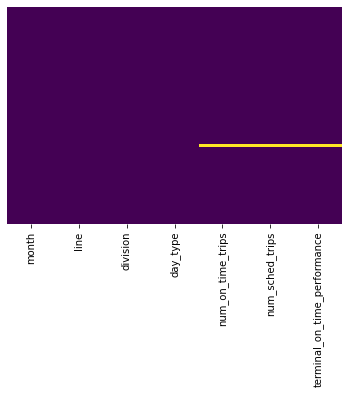

In [8]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

To remove the null values from the data, the mean of the three columns was calculated, then it was used to fill the missing values. 
This is done using the "fillna" method of the pandas DataFrame, which replaces any missing values in a specified column with the provided value


In [9]:
mean1= data['num_on_time_trips'].mean()
mean2= data['num_sched_trips'].mean()
mean3= data['terminal_on_time_performance'].mean()
data['terminal_on_time_performance']=data['terminal_on_time_performance'].fillna(mean3)
data['num_sched_trips']= data['num_sched_trips'].fillna(mean2)
data['num_on_time_trips']= data['num_on_time_trips'].fillna(mean2)


### 2.4 Cleaned dataset
Below is the dataset which contains cleaned data 

In [10]:
data

,month,line,division,day_type,num_on_time_trips,num_sched_trips,terminal_on_time_performance
0,2015-01,1,A DIVISION,1,6874.0,9017.0,0.762338
1,2015-01,2,A DIVISION,1,2920.0,6175.0,0.472874
2,2015-01,3,A DIVISION,1,4004.0,5834.0,0.686322
3,2015-01,4,A DIVISION,1,3692.0,7623.0,0.484324
4,2015-01,5,A DIVISION,1,3203.0,6491.0,0.493452
...,...,...,...,...,...,...,...
1658,2019-12,R,B DIVISION,2,1847.0,2160.0,0.855093
1659,2019-12,S Fkln,B DIVISION,1,4944.0,4956.0,0.997579
1660,2019-12,S Fkln,B DIVISION,2,2072.0,2092.0,0.990440
1661,2019-12,S Rock,B DIVISION,1,3379.0,3528.0,0.957766


In [11]:
data.isnull().sum()

month                           0
line                            0
division                        0
day_type                        0
num_on_time_trips               0
num_sched_trips                 0
terminal_on_time_performance    0
dtype: int64

### Updated heat map to show that the null values are covered

<AxesSubplot:>

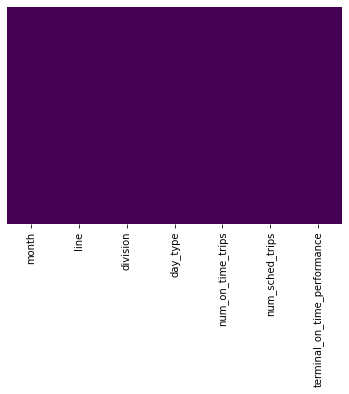

In [12]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### 2.5 Provide summary

When applied to a DataFrame, the describe() function returns a summary of statistics for each numerical column in the dataset. The generated statistics include count, mean, standard deviation, minimum, quartiles (25th, 50th, and 75th percentiles), and maximum values. These statistics can give you a quick overview of the dataset's distribution and basic summary information.


In [13]:
data.describe()

,day_type,num_on_time_trips,num_sched_trips,terminal_on_time_performance
count,1596.000000,1596.000000,1596.000000,1596.000000
mean,1.124060,4751.951122,6752.738716,0.710154
std,0.329753,2888.265841,3365.971259,0.174597
min,1.000000,172.000000,214.000000,0.244907
25%,1.000000,2800.750000,4400.000000,0.600218
50%,1.000000,3996.000000,6239.500000,0.706391
75%,1.000000,5525.250000,8375.000000,0.837873
max,2.000000,27578.000000,28040.000000,1.000000


# Exploratory data analysis

Exploratory Data Analysis (EDA) is an essential step in the data analysis process. It allows analysts to become familiar with the dataset, assess its quality, and uncover patterns and relationships within the data. By visualizing and summarizing the data, analysts gain insights into its structure, variables, and potential limitations. EDA helps in identifying data quality issues, such as errors or inconsistencies, which may impact the accuracy of the analysis. Moreover, it aids in hypothesis generation by discovering interesting patterns or anomalies that can guide further investigation. EDA also assists in preparing the data by identifying missing values, outliers, or inconsistencies that require preprocessing. The findings from EDA are crucial for effectively communicating insights to stakeholders using visualizations and summary statistics. Overall, EDA plays a vital role in understanding the data, generating hypotheses, and informing decision-making processes in various domains.

#### First plost depicts how year trend changes over the period of time from 2015 to 2019. Where as second plot depicts that same while considering day_type also.

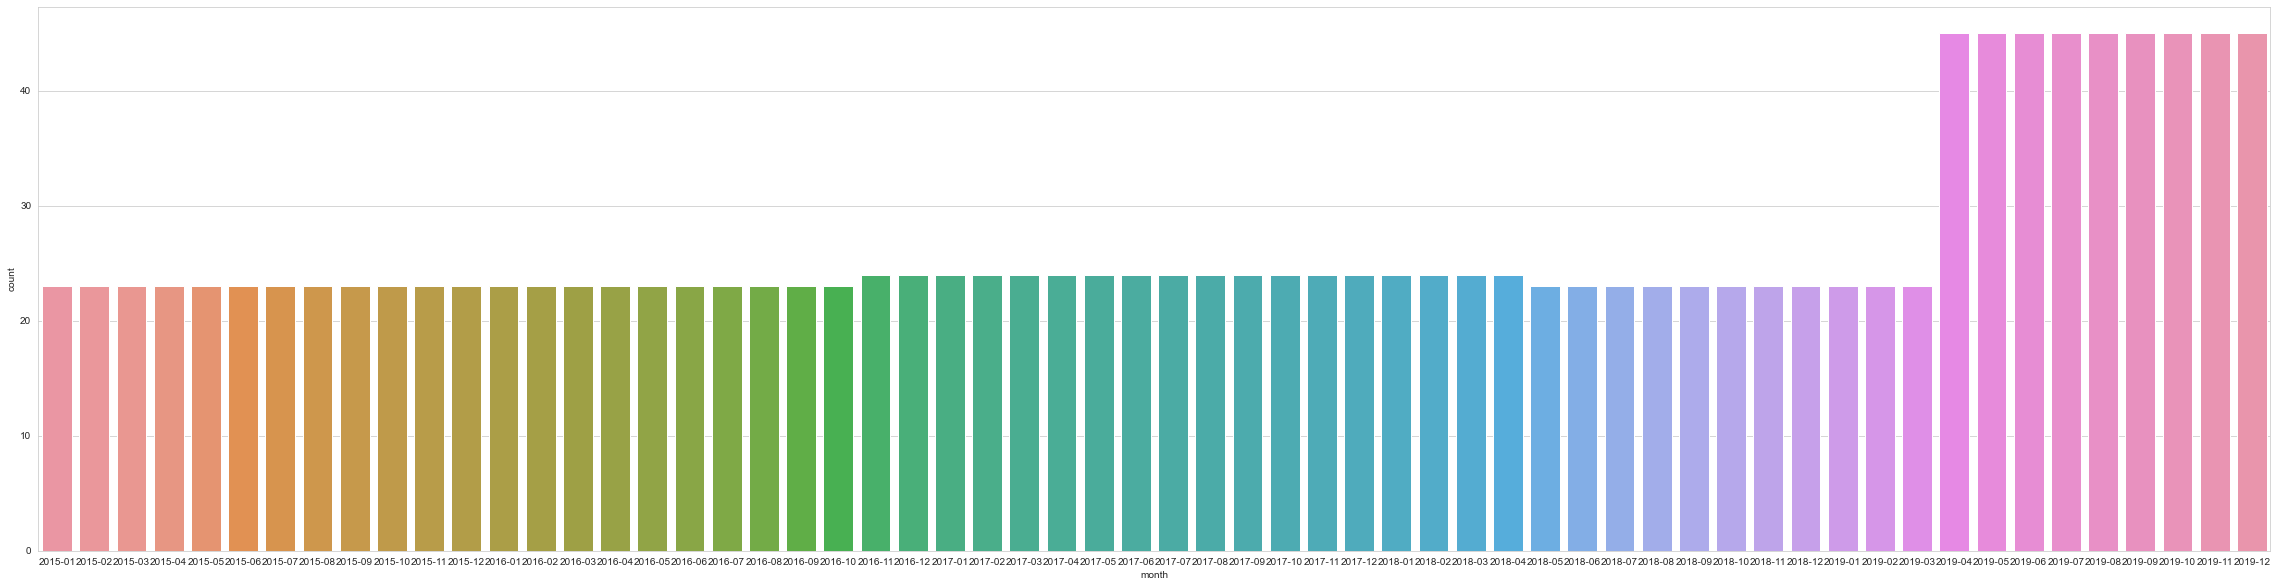

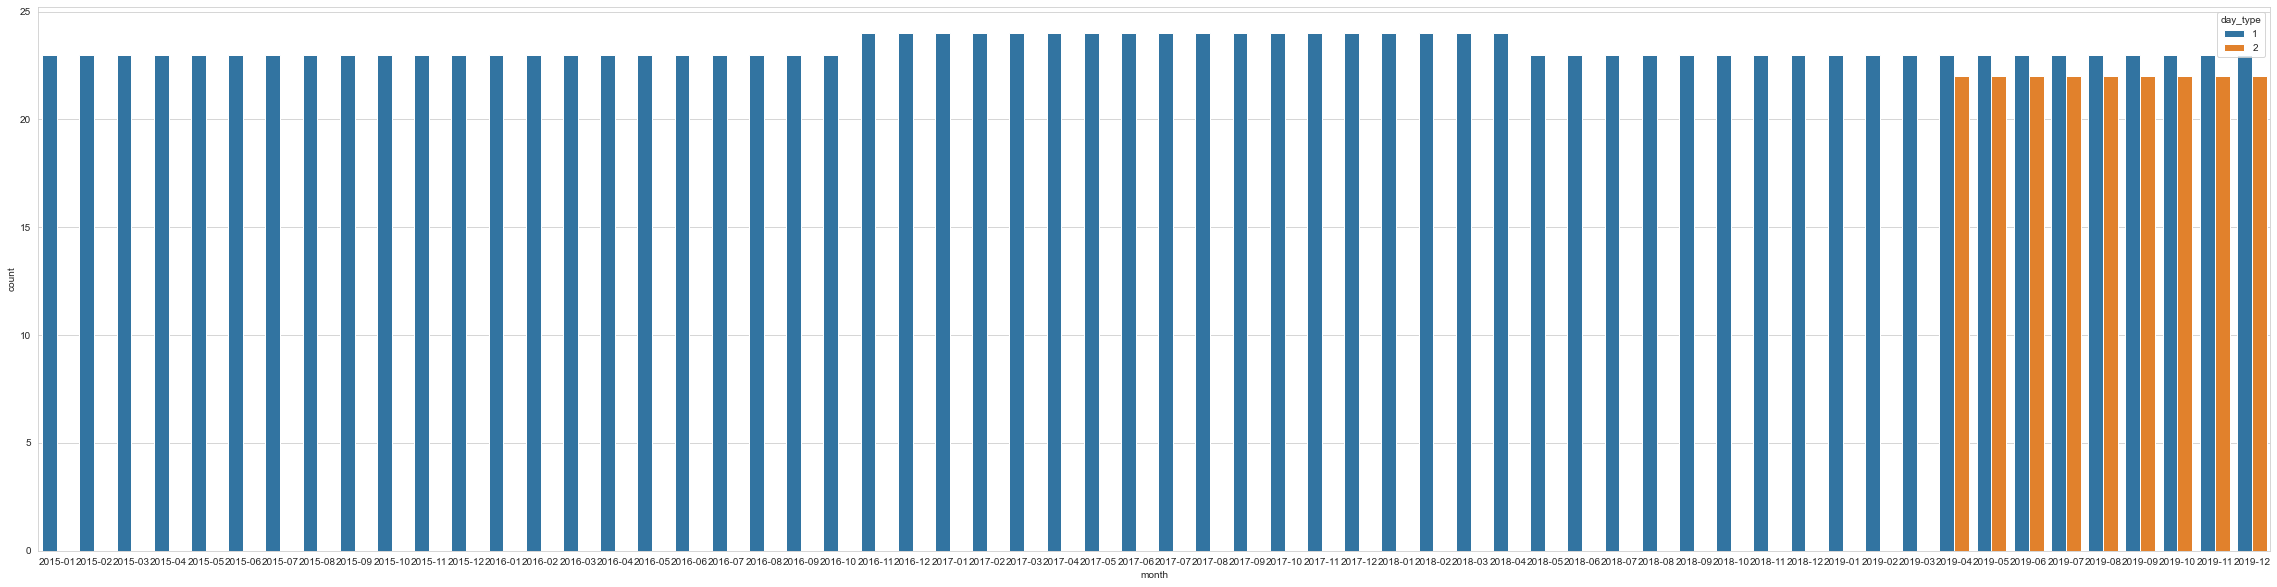

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='month',data = data)
fig = plt.gcf()
fig.set_size_inches(40, 10)  # adjust size as desired

# show plot
plt.show()

sns.countplot(x='month',hue='day_type',data = data)
fig = plt.gcf()
fig.set_size_inches(40, 10)  # adjust size as desired

# show plot
plt.show()

Analysis: 

From the Graph, it is clearly seen that in 2019, there were more entries i.e (highest) more trains  were scheduled compared to other years. Where as in 2015,2016 and 2018 has same number of train schedules and 2017 the number was bit higher than these years. 

Day_type 2 line tracks are  introduced from 2019-4 month onwards

#### This first  bar plot protrays the count for lines with respect to day_type. Where as second plot does the same wrt to DIVISION and thrid plot is just the to check count of different divisons over the years

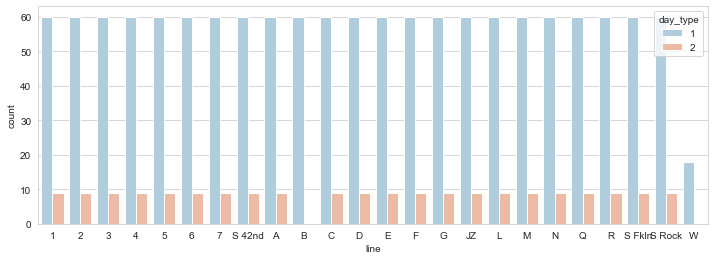

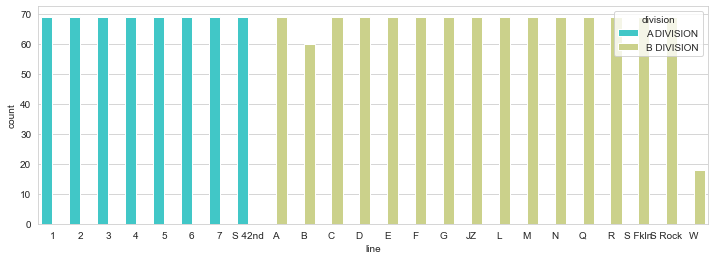

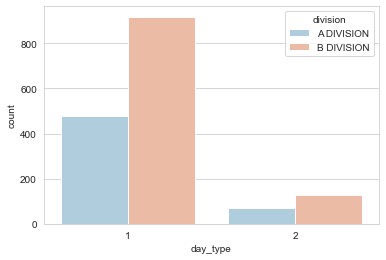

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='line',hue='day_type',data = data,palette='RdBu_r')
fig = plt.gcf()
fig.set_size_inches(12, 4)
plt.show()

sns.countplot(x='line',hue='division',data = data,palette='rainbow')
fig = plt.gcf()
fig.set_size_inches(12, 4)
plt.show()


sns.countplot(x='day_type',hue='division',data = data,palette='RdBu_r')
plt.show()

Analysis: 
Less number of trains were scheduled on line 'W'

'W' and 'B' have no Day_type 2 tracks

First 8 tracks are under A-division and later are in B division 

### EDA 1. The best and worst "on-time terminal performance" by year 

This is to get best and worst on-time terminal performance" by year. First we have a row called SystemWide in dataset. Up above we have created a new dataframe containing only systemwide rows. This Systemwide represents total ontime performace of each year. We used plt.plt (line plot) to get the graph for year vs on-time terminal performance. 

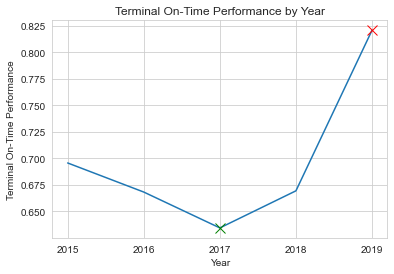

In [16]:
systemwide['Year'] = systemwide['month'].str[:4]
yearly_performance = systemwide.groupby('Year')['terminal_on_time_performance'].mean()

x = yearly_performance.index
y = yearly_performance.values
max_index = np.argmax(y)
min_index = np.argmin(y)

plt.plot(x, y)

# mark the maximum and minimum points
plt.plot(x[min_index], y[min_index], marker='x', color='green', markersize=10)
plt.plot(x[max_index], y[max_index], marker='x', color='red', markersize=10)

plt.xlabel('Year')
plt.ylabel('Terminal On-Time Performance')
plt.title('Terminal On-Time Performance by Year')
plt.show()


From the graph, we can observe the best on time performance was achieved in 2019 and worst on time performance was in 2017

### EDA 2. Best and worst terminal on-time performance by line 

This is to get best and worst on-time terminal performance" by line. We grouped the wrt to line and OTP( on-time performance) and used bar plot to depict the results

In [17]:
line_mean = data.groupby('line')['terminal_on_time_performance'].mean()
line_mean_sorted= line_mean.sort_values()
# print the 5 subway lines with the best terminal on-time performance
print("Best on-time performance:")
print(line_mean_sorted.head(5))

# print the 5 subway lines with the worst terminal on-time performance
print("\nWorst on-time performance:")
print(line_mean_sorted.tail(5))


Best on-time performance:
line
2    0.488552
4    0.514045
5    0.543314
F    0.582559
6    0.604637
Name: terminal_on_time_performance, dtype: float64

Worst on-time performance:
line
7         0.798338
L         0.917853
S Rock    0.946310
S 42nd    0.987782
S Fkln    0.991232
Name: terminal_on_time_performance, dtype: float64


The below Bar plot shows the lines with best and worst perfomance. First 5 lines with worst perfomace wheres as second five are line tracks with best performance

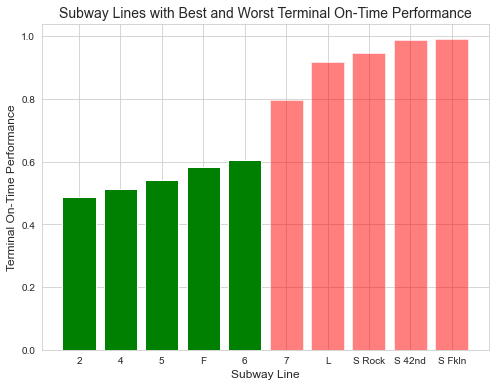

In [18]:
import matplotlib.pyplot as plt

# setting the figure size
plt.figure(figsize=(8,6))

# creating a bar plot for best terminal on-time performance
plt.bar(x=line_mean_sorted.head(5).index, height=line_mean_sorted.head(5).values, color='green')

# creating a bar plot for worst terminal on-time performance
plt.bar(x=line_mean_sorted.tail(5).index, height=line_mean_sorted.tail(5).values, color='red', alpha=0.5)

# setting the title and labels for the plot
plt.title('Subway Lines with Best and Worst Terminal On-Time Performance', fontsize=14)
plt.xlabel('Subway Line', fontsize=12)
plt.ylabel('Terminal On-Time Performance', fontsize=12)

plt.show()

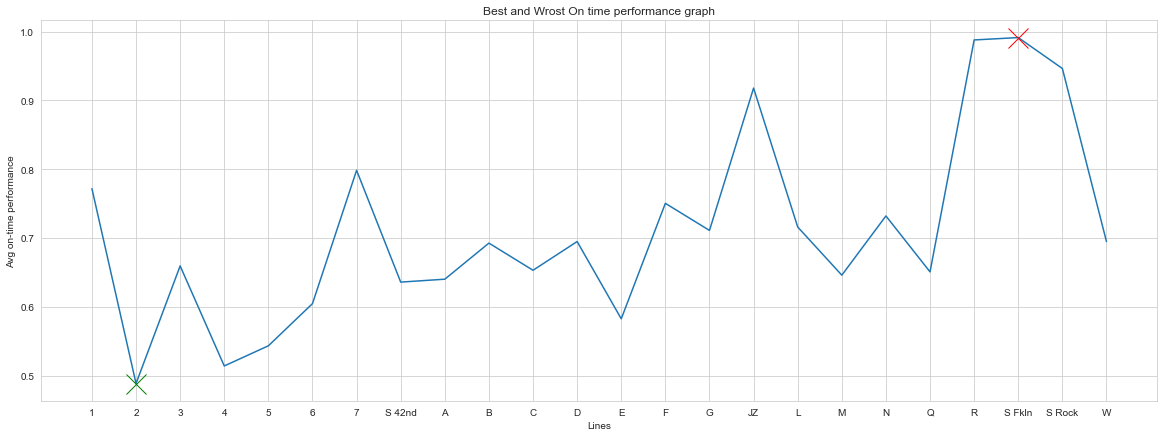

In [19]:
df = pd.DataFrame({'x': data['line'].unique(), 'y':line_mean})
# plotting a line plot after changing it's width and height
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(7)
x = df['x']
y = df['y']
max_index = np.argmax(y)
min_index = np.argmin(y)

# plot the line graph
plt.plot(df['x'], df['y'])

# mark the maximum and minimum points
plt.plot(x[min_index], y[min_index], marker='x', color='green', markersize=20)
plt.plot(x[max_index], y[max_index], marker='x', color='red', markersize=20)

# add labels and title
plt.xlabel('Lines')
plt.ylabel('Avg on-time performance')
plt.title('Best and Wrost On time performance graph')

# display the graph
plt.show()

This code calculates the mean terminal on-time performance for each subway line by grouping the data by line and then sorts the lines in ascending order based on their mean performance. It then prints the 5 subway lines with the best terminal on-time performance and the 5 subway lines with the worst terminal on-time performance.

line 2 has worst on-time terminal performance

S Fkln has best on-time terminal performance

### EDA 3. How does terminal on-time performance vary by month and line? 

The heatmap visualizes the mean terminal on-time performance for each month and subway line. The color to represents the performance value for each cell.

<AxesSubplot:xlabel='line', ylabel='month'>

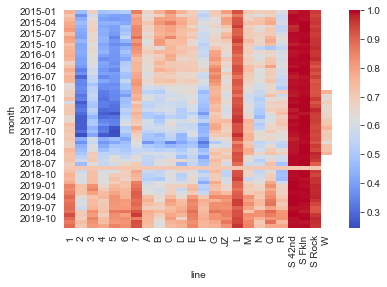

In [20]:
# Create a pivot table of the mean terminal_on_time_performance by month and line
table = pd.pivot_table(data, values='terminal_on_time_performance', index='month', columns='line', aggfunc='mean')
# Create a heatmap of the pivot table
sns.heatmap(table, cmap='coolwarm')

This would give you a graphical representation of the same information, where the color of each cell in the heatmap represents the mean terminal on-time performance for that month and line.

In [21]:
# Adding a new column Year 
data['Year'] = (data['month'].str[:4])
data

,month,line,division,day_type,num_on_time_trips,num_sched_trips,terminal_on_time_performance,Year
0,2015-01,1,A DIVISION,1,6874.0,9017.0,0.762338,2015
1,2015-01,2,A DIVISION,1,2920.0,6175.0,0.472874,2015
2,2015-01,3,A DIVISION,1,4004.0,5834.0,0.686322,2015
3,2015-01,4,A DIVISION,1,3692.0,7623.0,0.484324,2015
4,2015-01,5,A DIVISION,1,3203.0,6491.0,0.493452,2015
...,...,...,...,...,...,...,...,...
1658,2019-12,R,B DIVISION,2,1847.0,2160.0,0.855093,2019
1659,2019-12,S Fkln,B DIVISION,1,4944.0,4956.0,0.997579,2019
1660,2019-12,S Fkln,B DIVISION,2,2072.0,2092.0,0.990440,2019
1661,2019-12,S Rock,B DIVISION,1,3379.0,3528.0,0.957766,2019


### EDA 4. Analysis of Subway Lines based on Track Counts

The pie chart shows the percentage of the trains scheduled for each line over the year 2015-2019. 
And it shows all lines have same percent of trains schedules except for lines '1' and 'W'. The were less number of times comparitively 

Row count based on stations (First 10 rows)


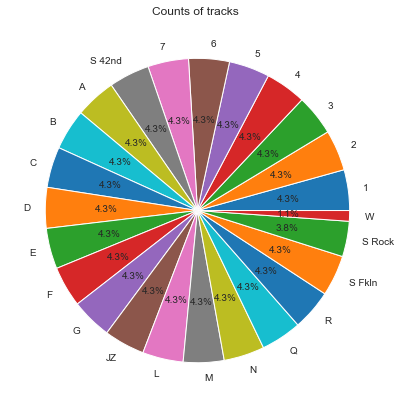

In [22]:
#Checking some columns value's counts

print("Row count based on stations (First 10 rows)")
data["line"].value_counts().sort_values(ascending=False)
f = plt.figure()
f.set_figwidth(40)
f.set_figheight(7)
plt.pie(data["line"].value_counts().sort_values(ascending=False),labels= data['line'].unique(), autopct='%1.1f%%')
plt.title("Counts of tracks ")
plt.show()

### EDA 5. PERFORMANCE BASED ON DIVISION/YEAR

This graph bar plot shows the performance of different subway lines based on the terminal on-time performance over the years.
Each line is represented by a different color.
This graph helps us to analyze the performance of different lines over the years. more clear version of plot for specific year can be found below

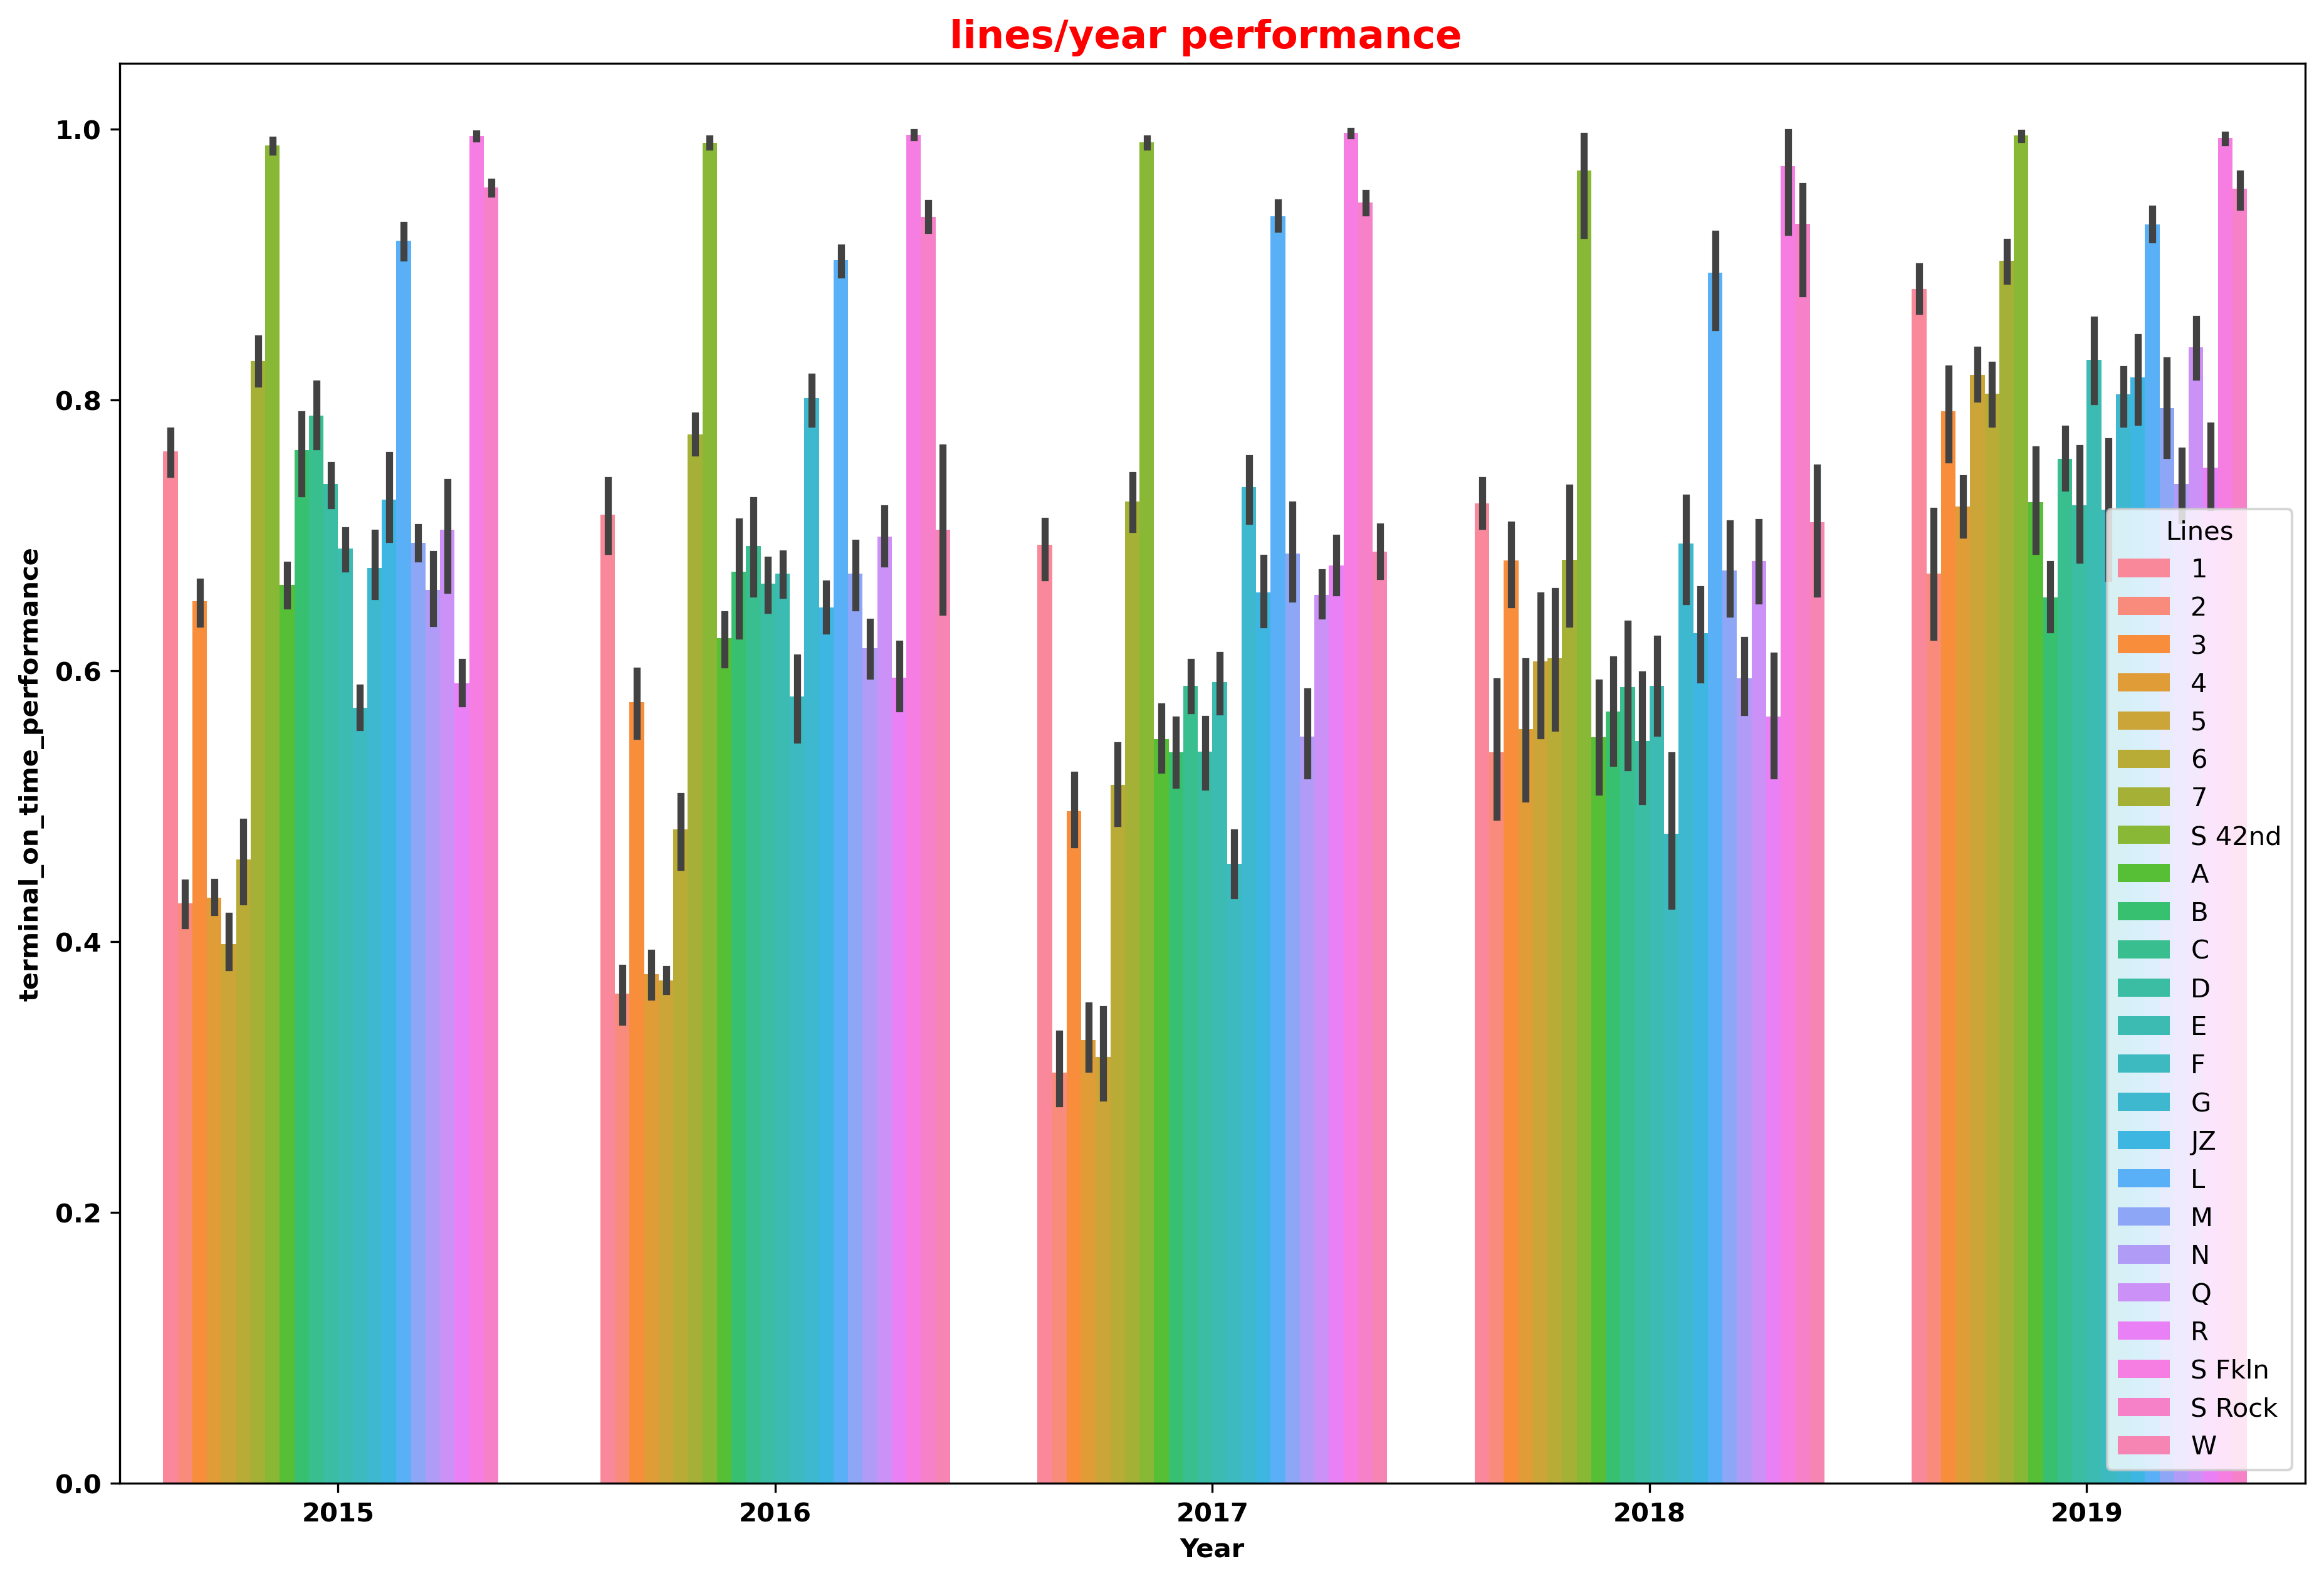

In [23]:
# Barplot for lines/year performance

plt.figure(figsize=(15,10),dpi=300),
plt.style.use('default')
ax = sns.barplot(x='Year',y="terminal_on_time_performance",hue='line',data=data, saturation=1)
plt.title("lines/year performance ", weight="bold", c="red", fontsize=15)
plt.xlabel("Year",weight="bold",c="k")
plt.xticks(rotation=0, weight="bold")
plt.ylabel("terminal_on_time_performance",weight= "bold",c="k")
plt.yticks(weight="bold")
plt.legend(title="Lines")
plt.show()



No handles with labels found to put in legend.


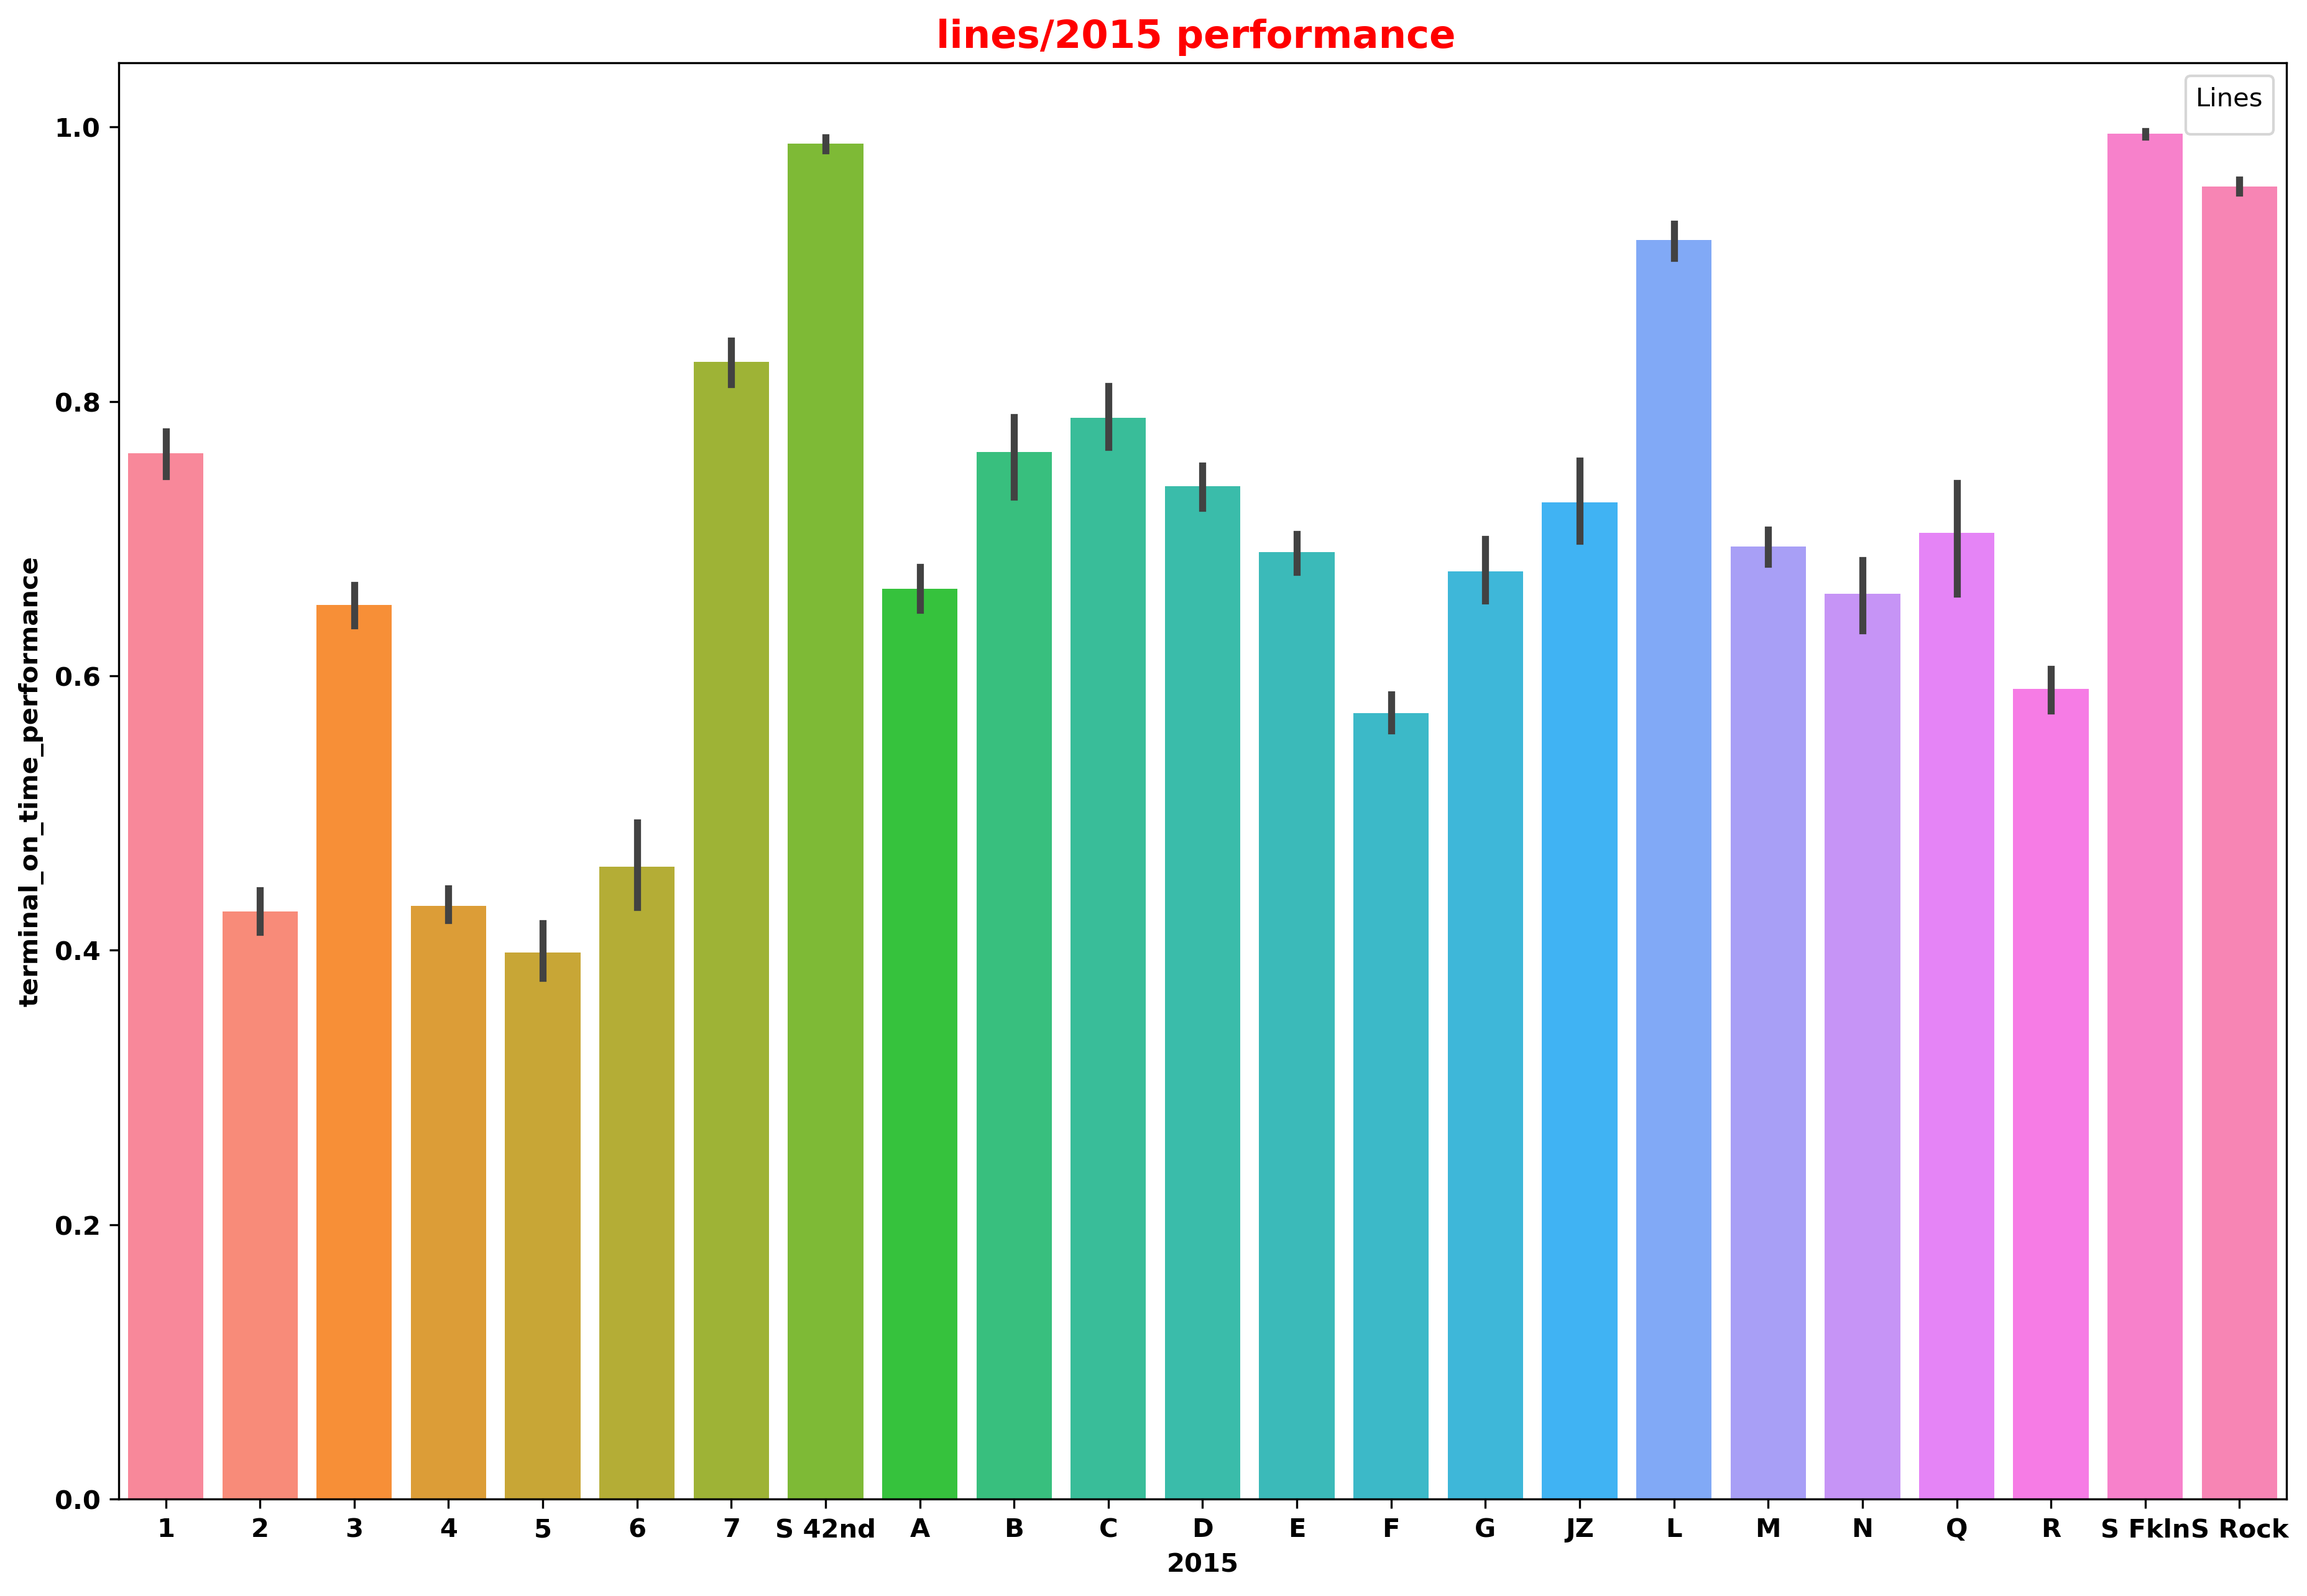

(None,)

In [24]:
plt.figure(figsize=(15,10),dpi=300),
plt.style.use('default')
ax = sns.barplot(x='line',y="terminal_on_time_performance",data=data.drop(data[data['Year']!="2015"].index), saturation=1)
plt.title("lines/2015 performance ", weight="bold", c="red", fontsize=15)
plt.xlabel("2015",weight="bold",c="k")
plt.xticks(rotation=0, weight="bold")
plt.ylabel("terminal_on_time_performance",weight= "bold",c="k")
plt.yticks(weight="bold")
plt.legend(title="Lines")
plt.show(),

### EDA 5. Performance Based on Division/Year

This bar plot displays the performance based on division. Each bar represents a year and is colored by division. ​
The height of each bar corresponds to the average terminal on-time performance for that year. ​
The plot allows us to compare the performance of different divisions over time.

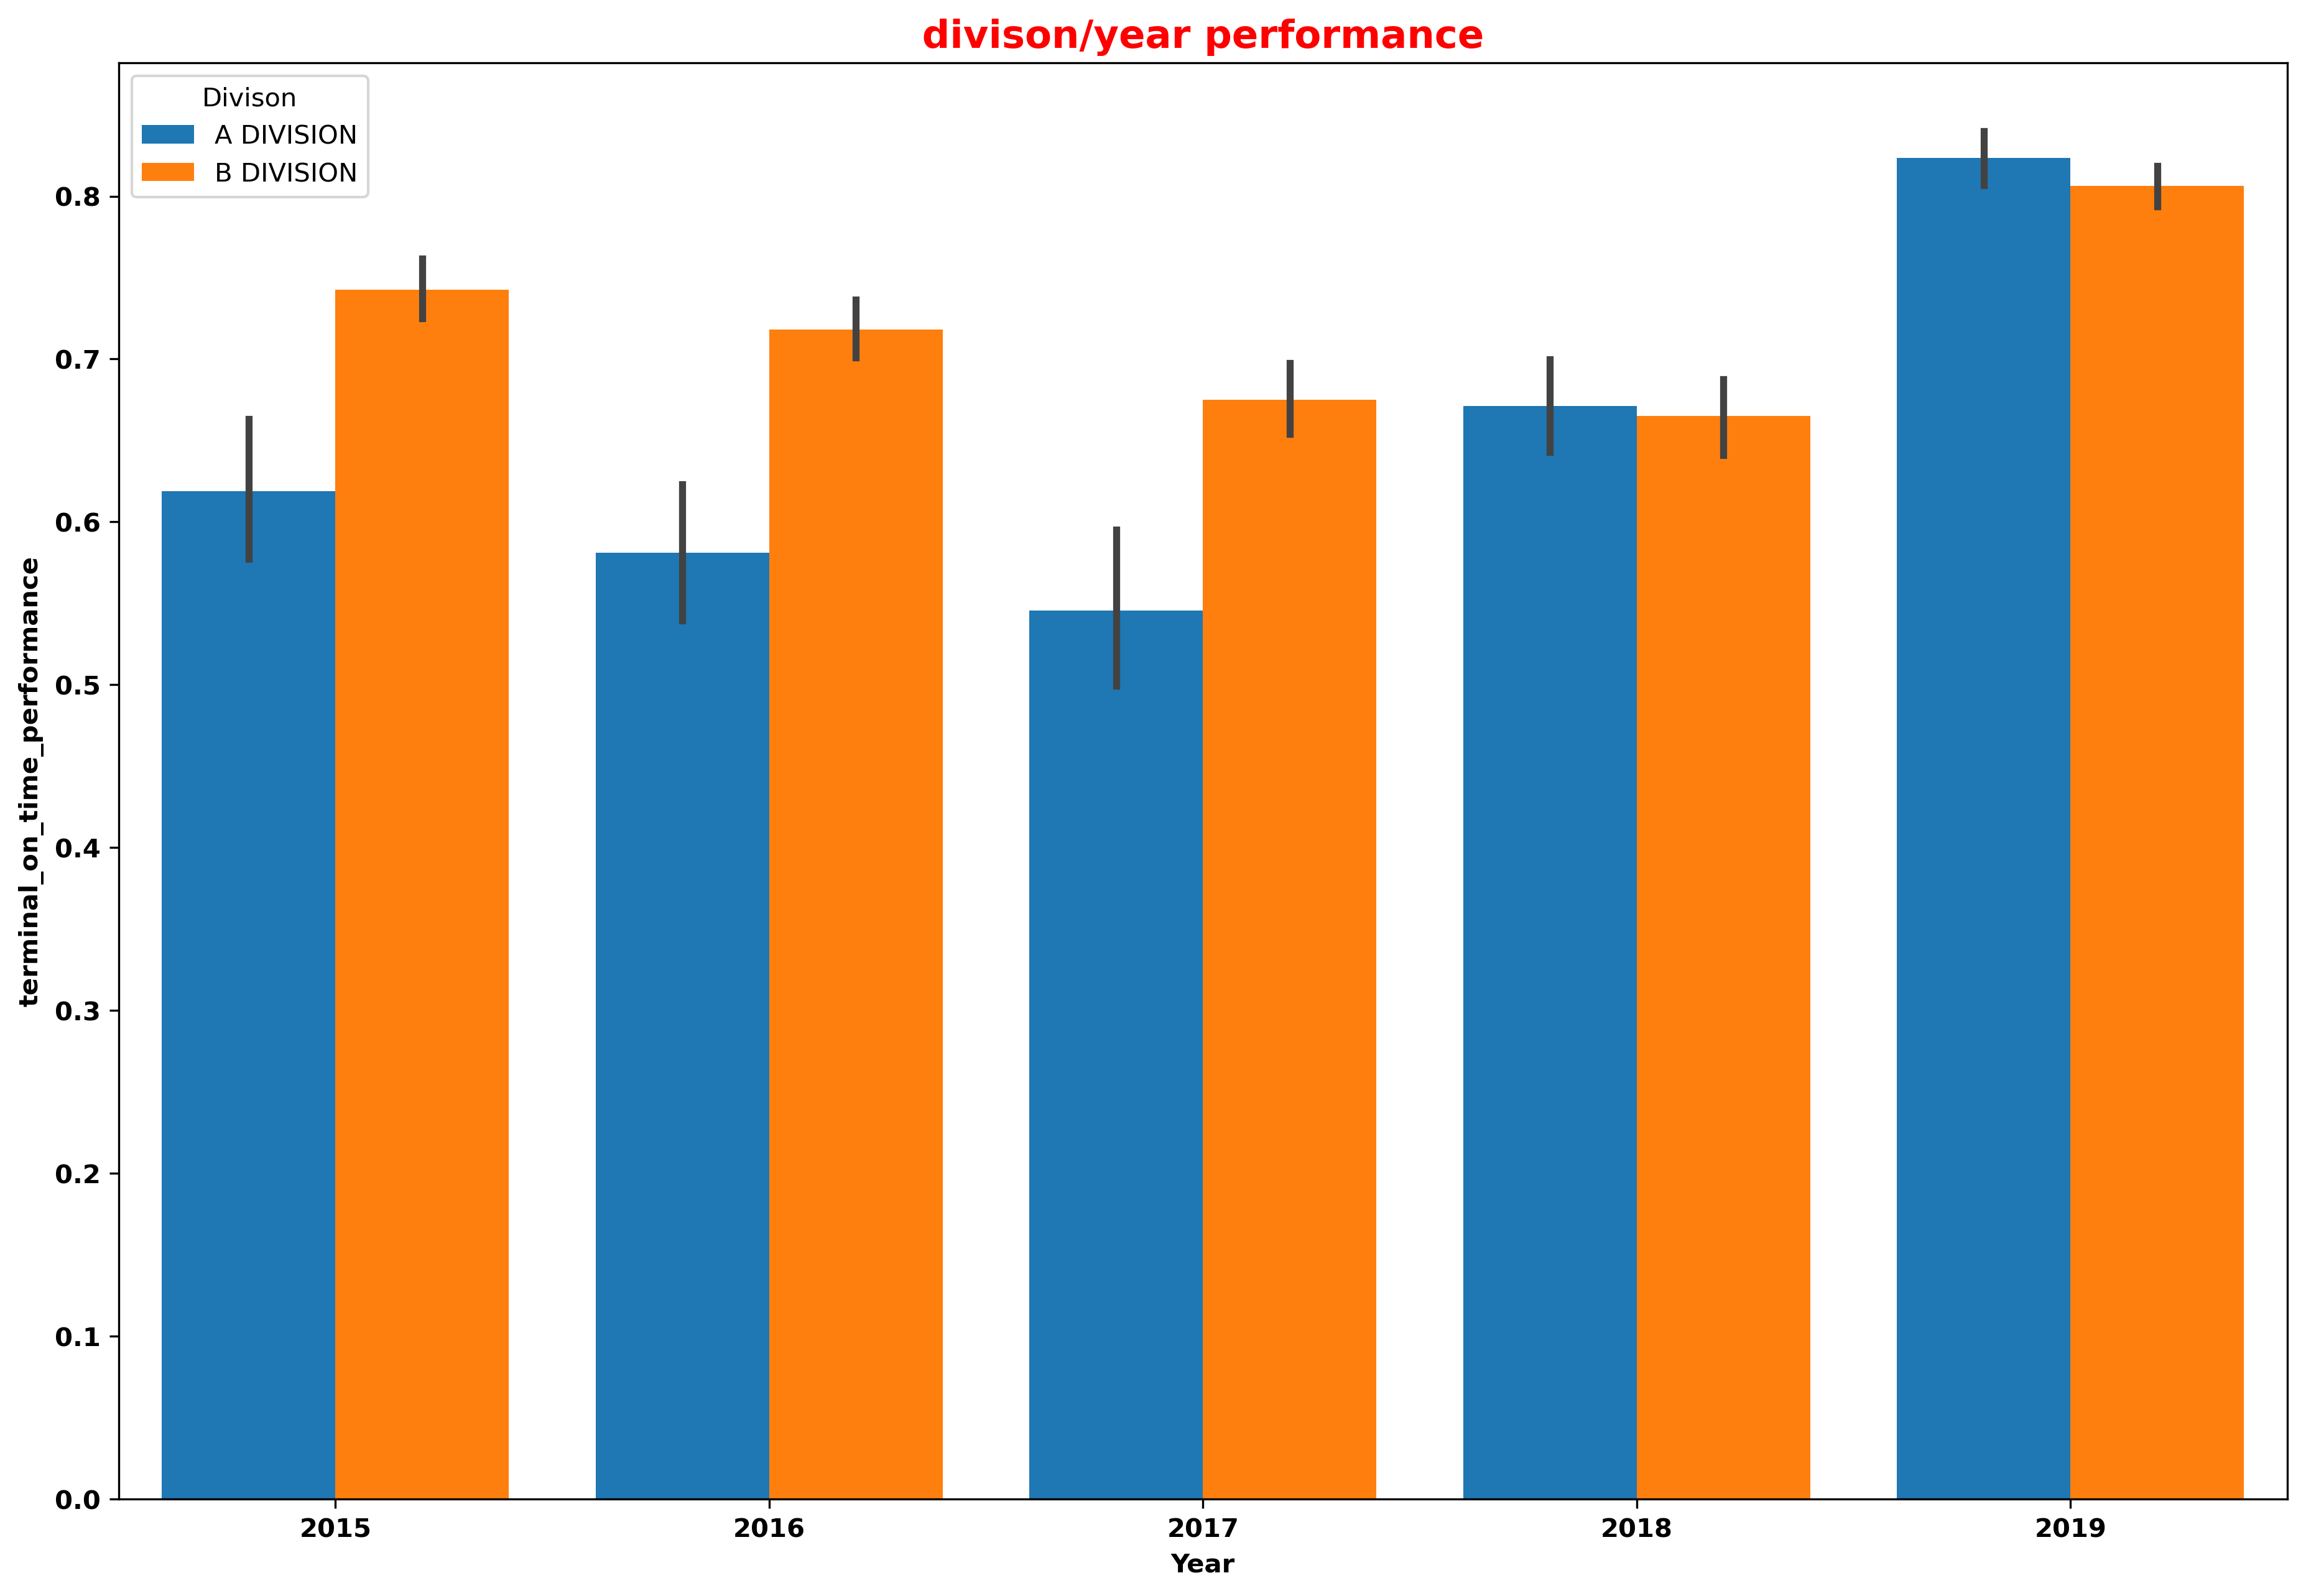

In [25]:
plt.figure(figsize=(15,10),dpi=300),
plt.style.use('default')
ax = sns.barplot(x='Year',y="terminal_on_time_performance",hue='division',data=data, saturation=1)
plt.title(" divison/year performance ", weight="bold", c="red", fontsize=15)
plt.xlabel("Year",weight="bold",c="k")
plt.xticks(rotation=0, weight="bold")
plt.ylabel("terminal_on_time_performance",weight= "bold",c="k")
plt.yticks(weight="bold")
plt.legend(title="Divison")
plt.show()

This plot shows the on-time performance of the different lines across the 2 divisions separately.

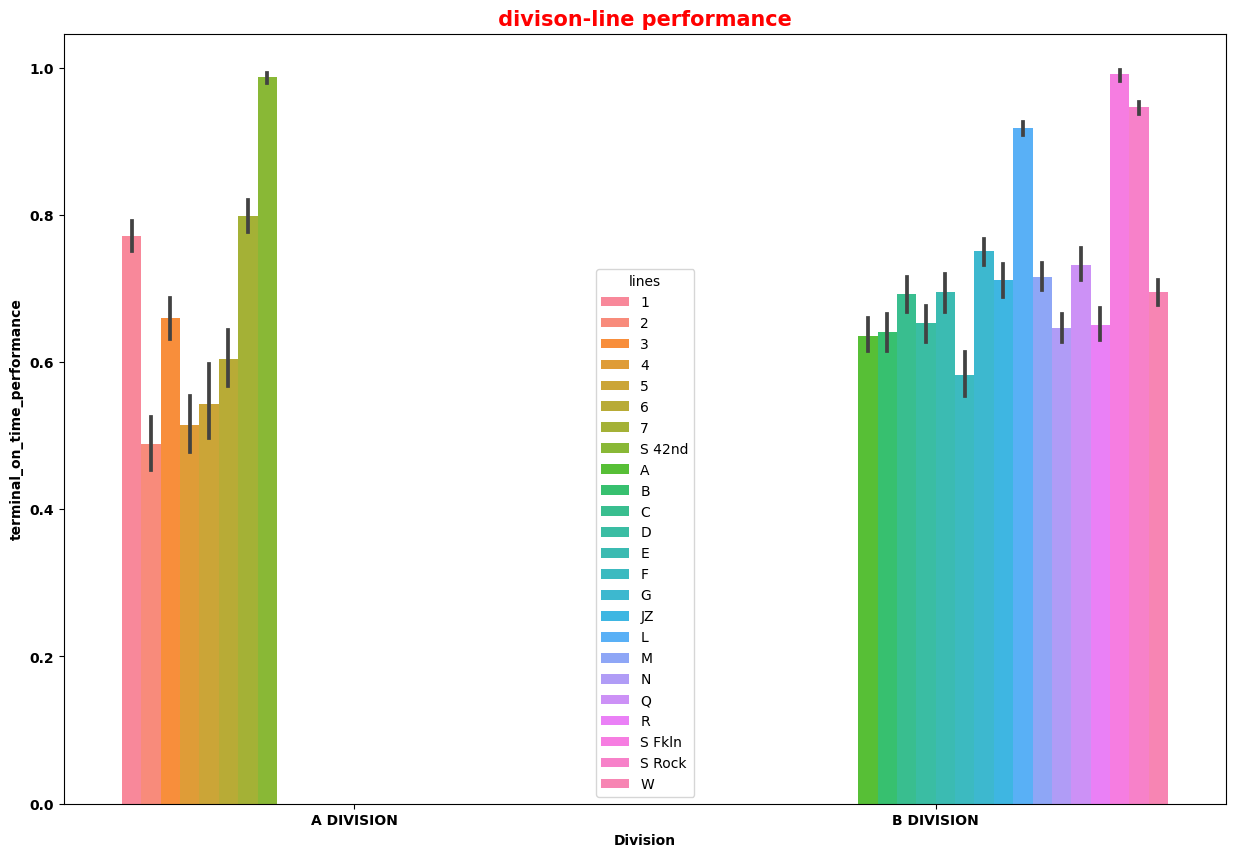

In [26]:
plt.figure(figsize=(15,10),dpi=100),
plt.style.use('default')
ax = sns.barplot(x='division',y="terminal_on_time_performance",hue='line',data=data, saturation=1)
plt.title(" divison-line performance ", weight="bold", c="red", fontsize=15)
plt.xlabel("Division",weight="bold",c="k")
plt.xticks(rotation=0, weight="bold")
plt.ylabel("terminal_on_time_performance",weight= "bold",c="k")
plt.yticks(weight="bold")
plt.legend(title="lines")
plt.show()

## PREDICTION ANALYSIS using Linear Regression  

## 4.1 What’s your target (Y) variable and what are your features (X) variables

Here in our dataset target (Y) is - terminal_on_time_performance. Where as features (X) are year, day_type, num_on_time_trips, num_sched_trips, DIVISION. 
In our dataset we have both categorical and numerical features involved. we have 3 categorical features and 4 numerical features. Therefore, to proceed further we need to convert these categorical values to numerical values, so that it can be used as ML model input. 

The pd.get_dummies() function takes a categorical variable and converts it into a set of binary variables, where each variable represents a unique category in the original variable. Finalyy, a new dataset named 'data' is created.

In [27]:
Div = pd.get_dummies(data['division'],drop_first=True)
year = pd.get_dummies(data['Year'],drop_first=True)
data.drop(['division','month','Year','line'],axis=1,inplace=True)
data=pd.concat([data,Div,year],axis=1)
data

,day_type,num_on_time_trips,num_sched_trips,terminal_on_time_performance,B DIVISION,2016,2017,2018,2019
0,1,6874.0,9017.0,0.762338,0,0,0,0,0
1,1,2920.0,6175.0,0.472874,0,0,0,0,0
2,1,4004.0,5834.0,0.686322,0,0,0,0,0
3,1,3692.0,7623.0,0.484324,0,0,0,0,0
4,1,3203.0,6491.0,0.493452,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1658,2,1847.0,2160.0,0.855093,1,0,0,0,1
1659,1,4944.0,4956.0,0.997579,1,0,0,0,1
1660,2,2072.0,2092.0,0.990440,1,0,0,0,1
1661,1,3379.0,3528.0,0.957766,1,0,0,0,1


## 4.2 What are your predictive models and why choose these models

The term predictive analytics refers to the use of statistics and modeling techniques to make predictions about future outcomes and performance. Predictive analytics looks at current and historical data patterns to determine if those patterns are likely to emerge again.Here are some popular predictive models:

1. Linear Regression : This model assumes a linear relationship between the input features and the target variable. It is simple and interpretable, making it useful for predicting continuous variables.

2. Logistic Regression : describing and explaining relationships between binary dependent variables and one or more nominal, interval, or ratio-level independent variables. Logistic regression allows you to predict the unknown values of a discrete target variable based on the known values of other variables.

3. Decision Trees: These models use a tree-like structure to make predictions by splitting data based on features. Decision trees are versatile, handle both categorical and numerical data, and can capture non-linear relationships.

4. Random Forests: A random forest is an ensemble of decision trees. It combines the predictions of multiple trees to produce more accurate results. Random forests are robust, handle high-dimensional data well, and can handle missing values and outliers.

5. Gradient Boosting Models: Gradient boosting models, such as XGBoost or LightGBM, also work by combining multiple weak models. They build trees sequentially, where each subsequent tree corrects the mistakes of the previous one. Gradient boosting models often perform well in predictive tasks and handle a variety of data types.

6. Neural Networks: Deep learning models composed of interconnected nodes called neurons. They excel at capturing complex patterns and relationships in large datasets. Neural networks can be used for a wide range of tasks, including image recognition, natural language processing, and time series forecasting.

The choice of predictive models depends on various factors, including:
Nature of the problem: Different models are suitable for different types of problems. For example, linear regression is appropriate for predicting continuous variables, while decision trees are useful for classification tasks. Interpretability vs. accuracy: Linear regression and decision trees are more interpretable, allowing humans to understand the reasoning behind the predictions. On the other hand, complex models like neural networks may provide higher accuracy but are less interpretable.

In our dataset, our target variable is continous so therefore we have to use models like linear Regression, SVM, Gradient Boosting, Random Forest etc. Here in our analysis we used Linear Regression and Random Forest.


Classification accuracy: If we have two arrays of labels (i.e., classes), we can calculate the classification accuracy as the percentage of labels that are correctly classified.

Mean absolute error (MAE): If we have two arrays of continuous values, we can calculate the MAE as the average absolute difference between the predicted and actual values.


## 4.3 What are your evaluation metrics and why to choose these metrics ?

We used the following measurement techniques to evaluate performance:
Mean Absolute Error (MAE) — the mean of the absolute value of the errors
Root Mean Squared Error (RMSE) — the square root of the mean of the squared errors
R2- Score: the proportion of the variance in the dependent variable (target variable) 

If we have two arrays of continuous values, we can calculate the MSE as the average absolute difference between the predicted and actual values. Therefore we chose those metrics for evaluation purpose.

## 4.4 What pre-processing (encoding, standardizing, etc.) methods you have applied; 

Clean and preprocess the data to remove any errors, inconsistencies, or missing values. Data preprocessing includes tasks such as data normalization, feature scaling, and data transformation.

1. Dealing with missing data :
Here in the data set, there are 23 missing values. The visualization of these missing values can be done using Heat map plot. To deal with missing data, here I used mean imputation, this process in done above. The above code replaces all null values in the data with mean value. Removed Sytsem_wide rows, which is not needed. 

## 4.5 How to fine-tune your models and how the predicting accuracy improves;

Fine-tuning models refers to the process of optimizing their performance by adjusting hyperparameters and other configuration settings. Here are some common steps involved in fine-tuning models:

Define the performance metric: Determine the evaluation metric that measures the effectiveness of your model. It could be accuracy, precision, recall, F1 score, or any other suitable metric depending on the specific task.

Split the data: Divide your dataset into training, validation, and test sets. The training set is used to train the model, the validation set is used for hyperparameter tuning, and the test set is used to evaluate the final performance.

Hyperparameter tuning: Use techniques such as grid search, random search, or Bayesian optimization to explore different combinations of hyperparameter values. Train and evaluate the model using each combination on the validation set, and choose the set of hyperparameters that yield the best performance according to your chosen metric.

Train the model: Once you have determined the optimal hyperparameters, train the model on the training set using these settings. The model will learn from the training data and adjust its internal parameters to minimize the chosen loss function.

Evaluate on the test set: After training, assess the final model's performance on the test set. This provides an unbiased estimate of how well the model is likely to perform on unseen data.

To improve the predicting accuracy, the fine-tuning process allows for iterative adjustments and enhancements. By selecting better hyperparameters, the model can be optimized to capture patterns and relationships in the data more effectively. Additionally, fine-tuning helps in addressing overfitting or underfitting issues by finding the right balance between model complexity and generalization.

we have continous values in target variable
The way to resolve this error is to simply convert the continuous values of the response variable to categorical values using the LabelEncoder() function from sklearn

In [28]:
target_= data['terminal_on_time_performance']
target_ = pd.DataFrame({'terminal_on_time_performance':target_})
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
target = lab.fit_transform(target_)
target = pd.DataFrame({'terminal_on_time_performance':target})
target

/Users/sandy/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,terminal_on_time_performance
0,990
1,158
2,710
3,171
4,186
...,...
1591,1199
1592,1527
1593,1466
1594,1403


In [29]:
Input = data.drop(['terminal_on_time_performance'],axis=1)
Input

,day_type,num_on_time_trips,num_sched_trips,B DIVISION,2016,2017,2018,2019
0,1,6874.0,9017.0,0,0,0,0,0
1,1,2920.0,6175.0,0,0,0,0,0
2,1,4004.0,5834.0,0,0,0,0,0
3,1,3692.0,7623.0,0,0,0,0,0
4,1,3203.0,6491.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
1658,2,1847.0,2160.0,1,0,0,0,1
1659,1,4944.0,4956.0,1,0,0,0,1
1660,2,2072.0,2092.0,1,0,0,0,1
1661,1,3379.0,3528.0,1,0,0,0,1


### performing normalization

Normalization is a common preprocessing technique used to transform continuous variables so that they have a specific scale or distribution. The goal of normalization is to make the variables more comparable and to improve the performance of machine learning models that use these variables as input.

Some machine learning algorithms, such as k-nearest neighbors, support vector machines, and gradient descent algorithms, are sensitive to the scale of the input variables. If the input variables are on different scales, the algorithm may give too much importance to some variables and too little importance to others, leading to poor performance. Ex; Z-score normalization and Min-Max scaling

In [30]:

y_norm = (target_ - target_.min()) / (target_.max() - target_.min())
y_norm_ = y_norm.values
y_norm_

array([[0.68525438],
       [0.30190645],
       [0.58458301],
       ...,
       [0.987339  ],
       [0.94406839],
       [0.95968653]])

## 4.6 What’s your final choice of model and what accuracy you have achieved.

We used two machine learning models to predict the on-time performance:Linear Regression and Random Forest

1. Import the necessary libraries. Some of the common libraries used in data science are NumPy, Pandas, and  Scikit-learn.

2. Separate the target variable from the features. The target variable is the variable you want to predict, while the features are the input variables.

3. Split the data into training and testing sets using Scikit-learn's train_test_split function. This function  randomly splits the data into two sets based on a specified test size or train size. The typical split ratio is 80% for training data and 20% for testing data.


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import mean_squared_error,r2_score
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# scalar = StandardScaler()
# x_scaled = pd.DataFrame(scalar.fit_transform(Input))

# x_new = x_scaled.iloc[:,:1].values
X_train, X_test, y_train, y_test = train_test_split(Input, y_norm, test_size=0.2, random_state=42)

Create an instance of the Linear Regression model using Scikit-learn's LinearRegression function. Train the model using the training data. This is typically done by calling the fit method on the Linear Regression model.Use the trained model to make a prediction on new data. This is typically done by calling the predict method on the Linear Regression model and passing in the new data, which is y_pred_norm. Evaluate the performance of the model. This is typically done by calculating metrics such as mean squared error, R-squared, or mean absolute error.

#### Linear Regression and its results

In [32]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_norm = lr_model.predict(X_test)
y_pred_norm

array([[ 0.38455146],
       [ 0.73806851],
       [ 0.41399491],
       [ 0.90994235],
       [ 0.83349658],
       [ 0.97931606],
       [ 0.64993101],
       [ 0.56825865],
       [ 0.69473021],
       [ 0.58097778],
       [ 0.15750555],
       [ 0.60871944],
       [ 0.5388632 ],
       [ 1.0042045 ],
       [ 0.63296152],
       [ 0.2546846 ],
       [ 1.00494323],
       [ 0.74515395],
       [ 0.68383051],
       [ 0.79757802],
       [ 0.77203043],
       [ 0.66037293],
       [ 0.84371019],
       [ 0.50325679],
       [ 0.66560538],
       [ 0.60340301],
       [ 0.85946524],
       [ 0.79759388],
       [ 0.58653453],
       [ 0.76907802],
       [ 0.63162836],
       [ 0.66175467],
       [ 0.71730288],
       [ 0.37368243],
       [ 0.6156602 ],
       [ 0.78219482],
       [ 0.69211336],
       [ 0.68291869],
       [ 0.71565139],
       [ 0.8050573 ],
       [ 0.74707515],
       [ 0.57812391],
       [ 0.9772367 ],
       [ 0.63181581],
       [ 0.74344478],
       [ 0

In [33]:
mse_1 = mean_squared_error(y_test, y_pred_norm)
rmse_1 = np.sqrt(mean_squared_error(y_test, y_pred_norm))
r2_1 = r2_score(y_test, y_pred_norm)
print('MSE:',mse_1)
print('RMSE:', rmse_1)
print('R2 Score: ', r2_1)

MSE: 0.009702973476189957
RMSE: 0.09850367239950984
R2 Score:  0.8050447782221422


#### RandomForest and its results 

In [34]:
#  Import the necessary libraries

from sklearn.ensemble import RandomForestRegressor

#  Fit the random forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=0)
rf_regressor.fit(X_train, y_train)

#  Make predictions
y_pred = rf_regressor.predict(X_test)
y_pred

/var/folders/lz/7nqb4lx96fq_6srflcnjch000000gn/T/ipykernel_1128/2489971780.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train, y_train)


array([0.41350377, 0.93627804, 0.30713517, 0.8997566 , 0.94518401,
       0.95732035, 0.69120093, 0.64255538, 0.56455853, 0.66475114,
       0.32925751, 0.58490385, 0.53078395, 0.93305473, 0.6511716 ,
       0.40384209, 0.94644821, 0.9937004 , 0.90761385, 0.7721493 ,
       0.82288891, 0.68111724, 0.89309056, 0.42314421, 0.75660905,
       0.73358641, 0.98401023, 0.73285785, 0.54177187, 0.66196904,
       0.6244053 , 0.67763053, 0.91863931, 0.46198479, 0.59753072,
       0.82408024, 0.91712748, 0.66847278, 0.71384016, 0.79576767,
       0.94248387, 0.58272266, 0.93320505, 0.56973616, 0.76449871,
       0.5759468 , 0.35011901, 0.51182018, 0.53430079, 0.68930664,
       0.56526141, 0.40873522, 0.3095115 , 0.99741209, 0.9302797 ,
       0.77560474, 0.46150373, 0.71836684, 0.70818558, 0.50753363,
       0.67227189, 0.44225368, 0.47562509, 0.35559535, 0.51358782,
       0.45908937, 0.42378763, 0.6058107 , 0.5223896 , 0.04902958,
       0.44137563, 0.59020612, 0.86191146, 0.71463107, 0.59582

In [35]:
# Evaluate the model
mse_2 = mean_squared_error(y_test, y_pred)
rmse_2 = np.sqrt(mse_2)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse_2)
print('RMSE: ', rmse_2)
print('R2 Score: ', r2)



MSE:  0.0007848123546328409
RMSE:  0.028014502576930413
R2 Score:  0.9842313011545479


###  Results of two models is printed and It is observed that random forest performance is better when compared to Linear Regression

In [36]:
results = pd.DataFrame({
    'Model': ['Linear Regression','Random Forest'],
    'mse': [mse_1, mse_2],
    'rmse': [rmse_1,rmse_2] ,
    'r2_score': [r2_1,r2,]
     })
result_df = results.sort_values(by='r2_score', ascending=False)
result_df = result_df.set_index('Model')
result_df.head(9)

,mse,rmse,r2_score
Model,,,
Random Forest,0.000785,0.028015,0.984231
Linear Regression,0.009703,0.098504,0.805045


## Summary 

### 5.1 Summarize the problem statement you addressed.

The MTA subway is a crucial transportation system for the people of New York City, providing reliable and affordable access to work, education, and leisure activities. It is a vital component of the city's infrastructure and economy. With millions of people depending on it every day, it's crucial that the subway runs smoothly and efficiently. In order to ensure that trains arrive on time and that the system is operating at peak performance, it's essential to understand how the system is performing.

### 5.2 Summarize how you addressed this problem statement (the data used and the methodology employed)

In this analysis, we explore the on-time performance of the MTA subway system from 2015 to 2019. We aim to answer several business questions such as identifying the best and worst on-time terminal performances by year and line, understanding how terminal on-time performance varies by month and line, and identifying the top 7 lines with the best on-time performance. Analysis of Subway Lines based on Track Counts was also done. Finally we have preprocess data and arranged in a way to perform predictive analysis. We used Linear Regression and Random Forest ML models and Evaluated the results. 

### 5.3 Summarize the interesting insights that your analysis provided.


Based on the EDA analysis conducted, the following observations were made:

1. The year 2019 showed the best on-time terminal performance, while 2017 showed the worst.
2. Day_type 2, which represents evening schedules, was introduced in April 2019.
3. The S FKln subway line had the best on-time performance across all five years, while the '2' subway line had the worst performance.
4. Most of the subway lines are under division B.
5. Subway tracks "W" and "S-Rock" had the least train schedules compared to other lines, which had an equal number of scheduled trains.
6. Subway tracks "W" and "B" did not have any Day_type 2 schedules, in all the years.
7. The first eight tracks are under A-division, and the rest are under B-division.

Overall, these observations provide insights into the on-time performance of different subway lines, schedules, and divisions over a period of five years.

### 5.4 Summarize the implications to the consumer of your analysis.

The analysis will provide insights to the users into the reliability and efficiency of the subway system. Understanding which lines and terminals have the best on-time performance can help commuters plan their routes and schedules more effectively. Additionally, identifying the busiest stations can help commuters avoid potential crowds and delays. Overall, by analyzing the subway system's on-time performance, we can gain a better understanding of its strengths and weaknesses and make more informed decisions as subway users.

### 5.5 Discuss the limitations of your analysis and how you, or someone else, could improve or build on it

The following steps could be taken to improve this work:
1.Use more advanced machine learning models with richer features, for example, we may include month information as part of the features to get better prediction results, by using date time conversion formatting.
2.More real data can be collected with more features to make the analysis better.
3.Use data from multiple years to capture year-to-year trends.
